In [162]:
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pmdarima as pm

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


plt.style.use("ggplot")

In [163]:
def parse_month(x):
    year = int(x.split("-")[0]) + 2000
    month = int(x.split("-")[1])
    day = 1
    return datetime.date(day=day,month=month,year=year)
df = pd.read_csv("../data/shampoo.csv")
df.Sales = df.Sales.astype(float)
df.Month = df.Month.apply(parse_month)
df = df.set_index("Month")

df.Sales = df.Sales.rolling(2).mean()
df = df.dropna()

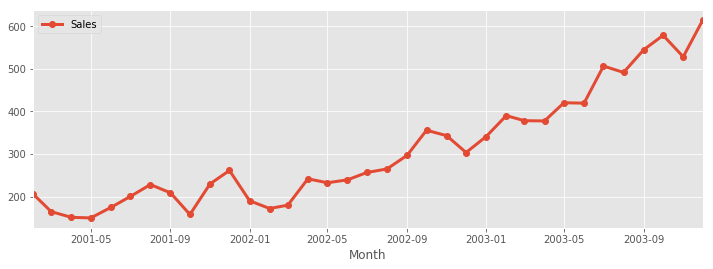

In [164]:
df.plot(figsize=(12,4), linewidth=3, marker="o")

train = df.Sales.values[0:30]
test = df.Sales.values[30:-1]

In [165]:
stepwise_fit = pm.auto_arima(train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=3,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 3); AIC=270.875, BIC=277.165, Fit time=0.140 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 3); AIC=282.833, BIC=285.349, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 3); AIC=280.649, BIC=285.682, Fit time=0.058 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 3); AIC=270.822, BIC=275.854, Fit time=0.095 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 3); AIC=272.657, BIC=278.947, Fit time=0.165 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 3); AIC=282.635, BIC=286.409, Fit time=0.027 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 3); AIC=273.195, BIC=276.969, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 3); AIC=266.419, BIC=27

In [166]:
from sklearn.metrics import median_absolute_error

In [167]:
MAPE = np.round(median_absolute_error(stepwise_fit.predict(4), test) / test.mean()  * 100, 4)
print(f"Median Absoloute Percent Error: {MAPE}%")

Median Absoloute Percent Error: 7.208%


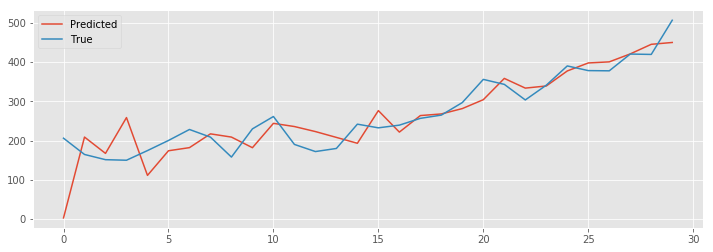

In [168]:
plt.figure(figsize=(12,4))
plt.plot(stepwise_fit.predict_in_sample(), label="Predicted")
plt.plot(train, label="True")
plt.legend()

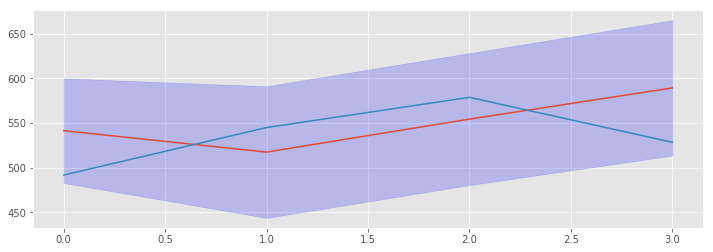

In [178]:
pred, conf = stepwise_fit.predict(4, return_conf_int=True)
plt.figure(figsize=(12,4))
index = range(len(pred))
plt.plot(index, pred)
plt.fill_between(index, conf[:,0], conf[:,1], color="blue", alpha=0.2)
plt.plot(index, test)

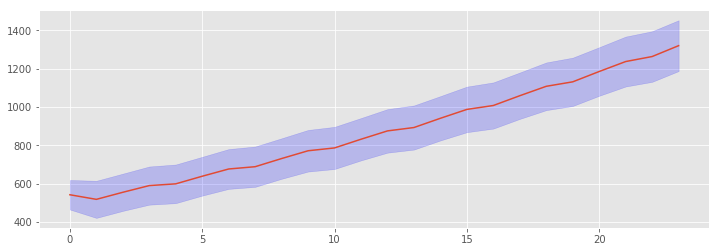

In [183]:
pred, conf = stepwise_fit.predict(24, return_conf_int=True, alpha=0.01)
plt.figure(figsize=(12,4))
index = range(len(pred))
plt.plot(index, pred)
plt.fill_between(index, conf[:,0], conf[:,1], color="blue", alpha=0.2)


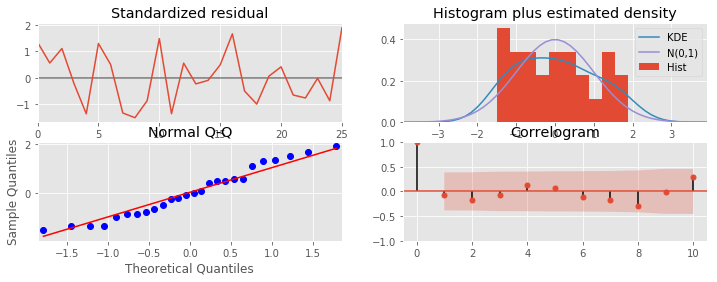

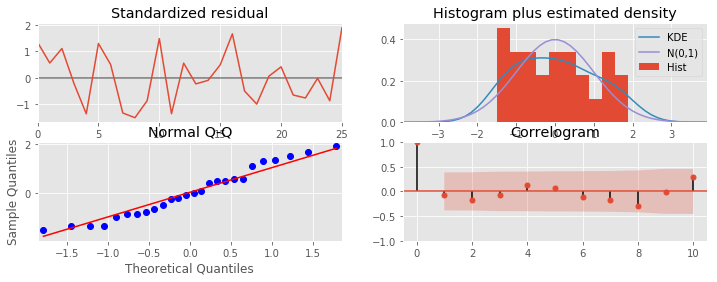

In [188]:
stepwise_fit.plot_diagnostics(figsize=(12,4))